# Machine Learning Project
# Spring 2019

Submitted By :

Maulik Modi (mm9817)

Vismay Suthar(vgs256)

# Import Library and Dataset

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
%matplotlib inline
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# PART I: Preprocessing

Here We are reading the training and testing files first , then We have defined some arrays which contains the name of Columns we want to preprocess. These arrays are for different purposes, like Dropping a column or combining a column or creating a new features.

In [64]:
# Reading the Training for Pre-Processing
df_train = pd.read_csv('qudditch_training.csv', na_values='?')
# Reading testing data
df_test = pd.read_csv('qudditch_testing_without_target.csv', na_values='?')
# df_train = df_train.drop(columns=['id_num.1'])
df_train.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_num,player_id,house,gender,age,weight,foul_type_id,game_move_id,penalty_id,game_duration,player_code,move_specialty,num_game_moves,num_game_losses,num_practice_sessions,num_games_satout,num_games_injured,num_games_notpartof,player_type,num_games_won,snitchnip,stooging,body_blow,checking,dopplebeater_defence,hawkshead_attacking_formation,no_hands_tackle,power_play,sloth_grip_roll,spiral_dive,starfish_and_stick,twirl,wronski_feint,zig-zag,bludger_backbeat,chelmondiston_charge,dionysus_dive,double_eight_loop,finbourgh_flick,reverse_pass,parkins_pincer,plumpton_pass,porskoff_ploy,transylvanian_tackle,woollongong_shimmy,change,snitch_caught,quidditch_league_player
0,1,8222157,Gryffindor,Female,11.0,NaN,6,25,1,1,NaN,specialty38,41,0,1,0,0,0,Beater1,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,2,55629189,Gryffindor,Female,12.0,NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,Multiple,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
2,3,86047875,Slytherin,Female,13.0,NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,Multiple,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,4,82442376,Gryffindor,Male,14.0,NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,Multiple,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,42519267,Gryffindor,Male,14.5,NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,Captain,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


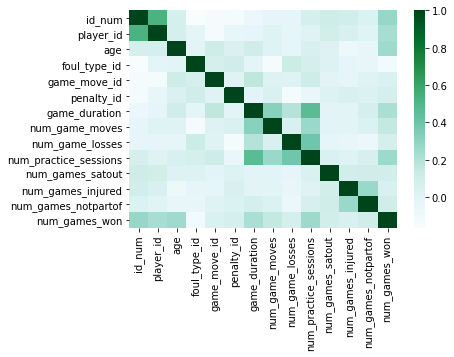

In [65]:
corrMap = df_train.corr()
sns.heatmap(corrMap, cmap='BuGn',
            xticklabels=corrMap.columns.values,
            yticklabels=corrMap.columns.values)

In [66]:
# Calculate total training data length to separate train and test file
trainData = len(df_train)
df = pd.concat(objs=[df_train, df_test], sort=True).reset_index(drop=True)
df_org = copy.deepcopy(df)

In [67]:
# NAN values anf the label columns
dropping_nan_columns = ['house', 'weight', 'player_code', 'move_specialty', 'quidditch_league_player']

# Dropping columns names
dropping_columns = ['id_num', 'finbourgh_flick', 'double_eight_loop']


# Creating Categorization
category_reduce_columns = ['stooging', 'snitchnip']

# Normalizing data columns names
normalizing_columns = ['age', 'game_duration', 'num_game_moves', 'num_game_losses', 'num_practice_sessions',
                       'num_games_won','foul_type_id', 'player_id', 'tactics_total', 'tactics_change', 
                       'num_games_notPlayed', 'stooging', 'snitchnip', 'game_move_id']

# categorical or nominal data
oneHotEncoding_columns = ['gender','player_type','snitchnip','stooging','body_blow','checking',
                          'dopplebeater_defence','no_hands_tackle',
                          'sloth_grip_roll','spiral_dive','twirl','wronski_feint','reverse_pass',
                          'parkins_pincer','change','snitch_caught', 'power_play', 
                        'transylvanian_tackle', 'woollongong_shimmy', 'porskoff_ploy', 'plumpton_pass', 'dionysus_dive',
                        'chelmondiston_charge', 'bludger_backbeat', 'zig-zag', 'starfish_and_stick', 
                        'hawkshead_attacking_formation']
# Tactics columns which will be combined
tactics_columns = ['body_blow', 'checking', 'dopplebeater_defence', 'hawkshead_attacking_formation', 'no_hands_tackle', 
                   'power_play', 'sloth_grip_roll', 'spiral_dive', 'starfish_and_stick', 'twirl', 'wronski_feint',
                   'zig-zag', 'bludger_backbeat', 'chelmondiston_charge', 'dionysus_dive', 'double_eight_loop', 
                   'finbourgh_flick', 'reverse_pass', 'parkins_pincer', 'plumpton_pass','porskoff_ploy', 
                   'transylvanian_tackle','woollongong_shimmy']

#### Handling missing values. (If ANY)

In [68]:
# drop label and missing values first and recalculate missing values with different tachnique.
df_org = df_org.drop(columns=dropping_nan_columns)

In [70]:
# create new 'specialtyNospecialty' value to replace NAN values in the 'move_specialty' feature.
missing_values_column = 'move_specialty'
move_specialty_pred = df['move_specialty'].replace(np.nan,'specialtyNospecialty')
move_specialty_pred = pd.get_dummies(move_specialty_pred, columns = missing_values_column, dtype=float, drop_first = True)
df_org = pd.concat([df_org, move_specialty_pred], axis=1)

#### Feature Datatype Conversion From Numeric to categoric and Vice-versa. (If ANY)

In [72]:
def oneHotEncoding(df, oneHotEncoding_columns):
    df_transform_new = pd.get_dummies(df, columns = oneHotEncoding_columns, dtype=float, drop_first = True)
    
    for column in list(df_transform_new):
        df[column] = df_transform_new[column]
    
    return df

In [73]:
def labelEncoding(df, labelEncoding_columns):
    le = preprocessing.LabelEncoder()
    df_new = df[labelEncoding_columns]
    df_transform_new = df_new.apply(le.fit_transform)
    
    for column in list(df_transform_new):
        df[column] = df_transform_new[column]
    
    return df

#### Feature Reduction or extraction. (If ANY)

In [74]:
def combineColumns(df, new_column):
    df[new_column] = df['num_games_satout'] + df['num_games_injured'] + df['num_games_notpartof']
    df = df.drop(columns=['num_games_satout', 'num_games_injured', 'num_games_notpartof'])
    return df

In [75]:
def updateReducingColumns(df, columns):
    mapping = {'None': 0, 'Norm': 1, 'High': 2}
    
    for column in columns:
        df = df.replace({column: mapping})

    return df

In [76]:
def updateTacticChanges(df, columns):
    mapping = {'No': 0, 'Down': 1, 'Steady': 2, 'Up': 3}
    
    for column in columns:
        df = df.replace({column: mapping})

    return df

In [77]:
def changeTacticChanges(df, columns):
    changes = {'Down': 1, 'Up': 1, 'No': 0, 'Steady': 0}
      
    for column in columns:
        df = df.replace({column: changes})
    
    return df

In [78]:
def reducingCategories(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: 'High' if (x not in ['None', 'Norm']) else x)
    
    return df

#### Any other Pre-processing Used. (Give the name along with the code.)

In [79]:
# Min-Max Scalar is used in this Method
def preprocess(df, normalizing_columns): 
    for col in normalizing_columns:
        min_ = df[col].min()
        max_ = df[col].max()
        exp = lambda df : (df-min_)/(max_-min_)
        df[col] = df[col].apply(exp)
    
    return df

In [80]:
def getRandomForestModel(X_train,y_train):
    rf = RandomForestClassifier(n_estimators=300, criterion='gini')
    rf = rf.fit(X_train,y_train)
#     rf_score = rf.score(X_test,y_test)
    return rf

In [81]:
def getTrainingAndTestingData(df_org, column):

    df_preprocessed_data = copy.deepcopy(df_org)
    df_preprocessed_data[column] = df[column]

    # Get null and not null data of column and 
    df_temp_train = df_preprocessed_data[df_preprocessed_data[column].notnull()]
    df_temp_null = df_preprocessed_data[df_preprocessed_data[column].isnull()]

    # Create test and train data
    df_temp_test_pred = df_temp_null.drop(columns=[column])
    new_df_temp_train = df_temp_train
    df_temp_labels = new_df_temp_train[column]
    df_temp_features = new_df_temp_train.drop(columns=[column])
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp_features, df_temp_labels, test_size=0.25, random_state=45)
    
    
    return X_train, X_test, y_train, y_test, df_temp_test_pred
    

In [82]:
# Combine columns
df_org = combineColumns(df_org, 'num_games_notPlayed')

# categorize columns
df_org = reducingCategories(df_org, category_reduce_columns)
df_org = updateReducingColumns(df_org, category_reduce_columns)

# Add the tactics changes
df_tactics_update = updateTacticChanges(df_org, tactics_columns)
df_org['tactics_total'] = df_tactics_update[tactics_columns].sum(axis=1)

# Keep the tactics changes
df_tactics_update = changeTacticChanges(df_org, tactics_columns)
df_org['tactics_change'] = df_tactics_update[tactics_columns].sum(axis=1)

In [84]:
# Data preprocessing and perform oneHotEncoding
df_org = preprocess(df_org, normalizing_columns)
df_org = oneHotEncoding(df_org.drop(columns= dropping_columns), oneHotEncoding_columns)
df_org = df_org.drop(columns= oneHotEncoding_columns)

### Predicting values for the column 'HOUSE'

In [88]:
column_pred = 'house';
X_train, X_test, y_train, y_test, df_temp_test_pred = getTrainingAndTestingData(df_org, column_pred)
rfm = getRandomForestModel(X_train,y_train)
pred_houses = rfm.predict(df_temp_test_pred)
df_temp_test_pred[column_pred] = pred_houses
df_house_test_pred = df_temp_test_pred[column_pred]
df_original_house_notNone = df[df[column_pred].notnull()][column_pred]
house_pred = pd.concat([df_original_house_notNone, df_house_test_pred])
house_pred.sort_index(inplace=True)
house_pred = pd.get_dummies(house_pred, columns = column_pred, dtype=float, drop_first = True)

df_org = pd.concat([df_org, house_pred], axis=1)

In [89]:
df_org.shape

(101766, 153)

## Predicting value for the column 'Player_code'

In [90]:
column_pred = 'player_code';
X_train, X_test, y_train, y_test, df_temp_test_pred = getTrainingAndTestingData(df_org, column_pred)
rfm = getRandomForestModel(X_train,y_train)
pred_player_code = rfm.predict(df_temp_test_pred)
df_temp_test_pred[column_pred] = pred_player_code
df_player_code_test_pred = df_temp_test_pred[column_pred]
df_original_player_code_notNone = df[df[column_pred].notnull()][column_pred]
player_code_pred = pd.concat([df_original_player_code_notNone, df_player_code_test_pred])
player_code_pred.sort_index(inplace=True)
player_code_pred = pd.get_dummies(player_code_pred, columns = column_pred, dtype=float, drop_first = True)
df_org = pd.concat([df_org, player_code_pred], axis=1)

In [91]:
df_org.shape

(101766, 169)

# PART II: Classification

In [135]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA()
pca.fit(df_org)
df_org_pca = pca.fit_transform(df_org)

In [136]:
df_org_pca = pd.DataFrame(df_org_pca)

In [137]:
# Separate the training and testing file before the model training.

df_org_pca['quidditch_league_player'] = df.quidditch_league_player
df_train_final = df_org_pca[:trainData]
df_test_final = df_org_pca[trainData:]
df_test_final.reset_index(drop=True)
df_test_final = df_test_final.drop(columns=['quidditch_league_player'])
df_train_final_without_label = df_train_final.drop(columns=['quidditch_league_player'])

In [93]:
def getTrainingAndTestingData(df_org, column):

    df_preprocessed_data = copy.deepcopy(df_org)
    df_preprocessed_data[column] = df[column]

    # Get null and not null data of column and 
    df_temp_train = df_preprocessed_data[df_preprocessed_data[column].notnull()]
    df_temp_null = df_preprocessed_data[df_preprocessed_data[column].isnull()]

    # Create test and train data
    df_temp_test_pred = df_temp_null.drop(columns=[column])
    new_df_temp_train = df_temp_train
    df_temp_labels = new_df_temp_train[column]
    df_temp_features = new_df_temp_train.drop(columns=[column])
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp_features, df_temp_labels, test_size=0.25, random_state=45)
    
    
    return X_train, X_test, y_train, y_test, df_temp_test_pred

### Model 1:
Model Name: Neural Networks<br>
Evaluation method and metric used Name:F1 score and Confusion Matrix<br>
Name of the Hyperparameter used: alpha, activation function, hidden layers in neural networks<br>


In [94]:
def getMLPModel(X_train,y_train):
    mlp =  MLPClassifier(alpha=0.01, activation='logistic', hidden_layer_sizes =(100,50,) )
    mlp = mlp.fit(X_train, y_train)
    mlp_score = mlp.score(X_test,y_test)
    print ('nueral net score: ', mlp_score)
    return mlp

In [149]:
column_pred = 'quidditch_league_player'
X_train, X_test, y_train, y_test = train_test_split(df_train_final_without_label, df_train_final[column_pred], test_size=0.3, random_state=45)

# Upscaling the data
sm = SMOTE(random_state=45, ratio = 1.0)
X_train_sm_nn, y_train_sm_nn = sm.fit_sample(X_train, y_train)

x1_nn = pd.DataFrame(X_train_sm_nn)
y1_nn = pd.DataFrame(y_train_sm_nn)


In [150]:
pred_model_NN = getMLPModel(x1_nn,y1_nn)
y_predicted_NN = pred_model_NN.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nueral net score:  0.7749506254114549


In [151]:
print("=== F1 Score ===")
print(f1_score(y_test, y_predicted_NN,average='micro'))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predicted_NN))
print('\n')

=== F1 Score ===
0.7749506254114548


=== Confusion Matrix ===
[[22644  4361]
 [ 2476   899]]




In [152]:
y_predicted_NN_test = pred_model_NN.predict(df_test_final)
np.unique(y_predicted_NN_test, return_counts=True)

(array(['NO', 'YES'], dtype='<U3'), array([408,  92]))

### Model 2:
Model Name:AdaBoost<br>
Evaluation method and metric used Name:F1 score and Confusion Matrix<br>
Name of the Hyperparameter used: n_estimators<br>


In [155]:
def adaBoostModel(X_train,y_train):
    rf = AdaBoostClassifier(n_estimators=100)
    rf = rf.fit(X_train,y_train)
    rf_score = rf.score(X_test,y_test)
    print ('AdaBosst score: ', rf_score)
    return rf

In [153]:
column_pred = 'quidditch_league_player'
X_train, X_test, y_train, y_test = train_test_split(df_train_final_without_label, df_train_final[column_pred], test_size=0.3, random_state=45)

# Upscaling the data
sm = SMOTE(random_state=45, ratio = 1.0)
X_train_sm_ab, y_train_sm_ab = sm.fit_sample(X_train, y_train)

x1_ab = pd.DataFrame(X_train_sm_ab)
y1_ab = pd.DataFrame(y_train_sm_ab)


In [156]:
pred_model_AB = adaBoostModel(x1_ab,y1_ab)
y_predicted_AB = pred_model_AB.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBosst score:  0.6531599736668862


In [157]:
print("=== F1 Score ===")
print(f1_score(y_test, y_predicted_AB,average='micro'))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predicted_AB))
print('\n')

=== F1 Score ===
0.6531599736668862


=== Confusion Matrix ===
[[18377  8628]
 [ 1909  1466]]




In [158]:
y_predicted_AB_test = pred_model_AB.predict(df_test_final)
np.unique(y_predicted_AB_test, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([327, 173]))

### Model 3:
Model Name: Random Forest<br>
Evaluation method and metric used Name: F1 score and Confusion Matrix<br>
Name of the Hyperparameter used: n_estimators and criterion <br>


In [138]:
def getRandomForestModel(X_train,y_train):
    rf = RandomForestClassifier(n_estimators=100, criterion='gini')
    rf = rf.fit(X_train,y_train)
    rf_score = rf.score(X_test,y_test)
    print ('Random Forest score: ', rf_score)
    return rf

In [140]:
column_pred = 'quidditch_league_player'
X_train, X_test, y_train, y_test = train_test_split(df_train_final_without_label, df_train_final[column_pred], test_size=0.3, random_state=45)

# Upscaling the data
sm = SMOTE(random_state=45, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


In [141]:
x1 = pd.DataFrame(X_train_sm)
y1 = pd.DataFrame(y_train_sm)

In [142]:
pred_model_RF = getRandomForestModel(x1,y1)
y_predicted_RF = pred_model_RF.predict(X_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest score:  0.8374588545095457


In [143]:
print("=== F1 Score ===")
print(f1_score(y_test, y_predicted_RF,average='micro'))
print('\n')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predicted_RF))
print('\n')

=== F1 Score ===
0.8374588545095457


=== Confusion Matrix ===
[[24951  2054]
 [ 2884   491]]




# PART III: Best Hypothesis:
Model Name: Random Forest<br>
Reason: Better F1 score and Better Confusion matrix result<br>
Hyper-parameter Value:n_estimators=1500, criterion='gini'<br>

In [144]:
y_predicted_RF_test = pred_model_RF.predict(df_test_final)
np.unique(y_predicted_RF_test, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([458,  42]))

In [108]:
# Cross validate on the x_train and y_train file
rf_score = cross_val_score(pred_model_RF, X_train, y_train, cv=5)

In [109]:
rf_score

array([0.88827761, 0.88813655, 0.88848134, 0.88848134, 0.88847348])

In [148]:
# Download the predicted test data in the csv file

df_res = pd.DataFrame(y_predicted_RF_test, columns=['quidditch_league_player'])
df_res['id_num'] = df_res.index
df_res.id_num += 1
df_res = df_res.set_index('id_num')
df_res.to_csv('test_outputs.csv')